In [6]:
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
wind_max = []
pressure_min = []

with open('hurdat2-1851-2021-041922.txt', newline='') as f:
    reader = csv.reader(f)
    rows = list(reader)

    storm_count = 0
    r = 0

    while r < len(rows):
        rows_count = int(rows[r][2])
        storm_count += 1
        r += 1

        wind_speeds = [int(l[6]) for l in rows[r:r + rows_count]]

        wind_max.append(max(wind_speeds))

        pressures = [int(l[7]) for l in rows[r:r + rows_count] if int(l[7]) > 0]
        if pressures != []:
            pressure_min.append(min(pressures))
        else:
            pressure_min.append(-999)

        r += rows_count


(array([  4.,   6.,  17.,  52.,  79., 119., 155., 218., 338., 198.]),
 array([ 882. ,  895.4,  908.8,  922.2,  935.6,  949. ,  962.4,  975.8,
         989.2, 1002.6, 1016. ]),
 <BarContainer object of 10 artists>)

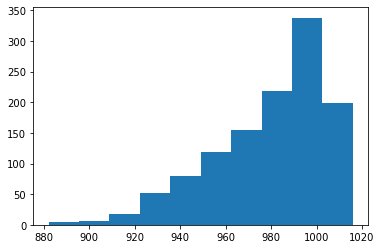

In [4]:
plt.hist([p for p in pressure_min if p > 0])

(array([ 68., 157.,  58., 102., 146., 194., 105., 140.,  72., 159.,  75.,
         81.,  83., 115.,  54.,  63.,  59.,  40.,  32.,  34.,  26.,  25.,
         11.,  13.,   6.,  10.,   3.,   5.]),
 array([ 25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,  85,
         90,  95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150,
        155, 160, 165]),
 <BarContainer object of 28 artists>)

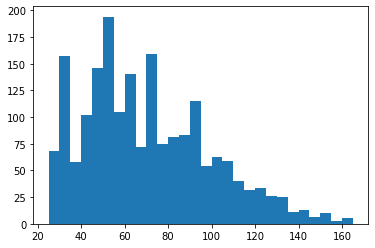

In [5]:

plt.hist(wind_max, bins=range(min(wind_max), max(wind_max) + 5, 5))

In [8]:
ksN = 100           # Kolmogorov-Smirnov KS test for goodness of fit: samples
ALPHA = 0.05        # significance level for hypothesis test

from scipy.stats import (
    norm, beta, expon, gamma, genextreme, logistic, lognorm, triang, uniform, fatiguelife,            
    gengamma, gennorm, dweibull, dgamma, gumbel_r, powernorm, rayleigh, weibull_max, weibull_min, 
    laplace, alpha, genexpon, bradford, betaprime, burr, fisk, genpareto, hypsecant, 
    halfnorm, halflogistic, invgauss, invgamma, levy, loglaplace, loggamma, maxwell, 
    mielke, ncx2, ncf, nct, nakagami, pareto, lomax, powerlognorm, powerlaw, rice, 
    semicircular, trapezoid, rice, invweibull, foldnorm, foldcauchy, cosine, exponpow, 
    exponweib, wald, wrapcauchy, truncexpon, truncnorm, t, rdist
    )

distributions = [
    norm, beta, expon, gamma, genextreme, logistic, lognorm, triang, uniform, fatiguelife,            
    gengamma, gennorm, dweibull, dgamma, gumbel_r, powernorm, rayleigh, weibull_max, weibull_min, 
    laplace, alpha, genexpon, bradford, betaprime, burr, fisk, genpareto, hypsecant, 
    halfnorm, halflogistic, invgauss, invgamma, levy, loglaplace, loggamma, maxwell, 
    mielke, ncx2, ncf, nct, nakagami, pareto, lomax, powerlognorm, powerlaw, rice, 
    semicircular, trapezoid, rice, invweibull, foldnorm, foldcauchy, cosine, exponpow, 
    exponweib, wald, wrapcauchy, truncexpon, truncnorm, t, rdist
    ]

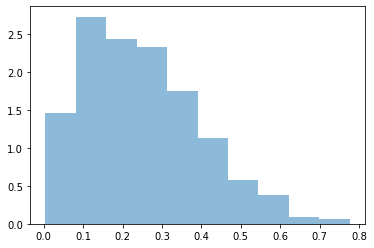

In [97]:
a, b = 2, 6

x = beta.rvs(a,b,size=1000)

fig, ax = plt.subplots(1,1)
ax.hist(x, density=True, histtype='stepfilled', alpha=0.5)
plt.show()

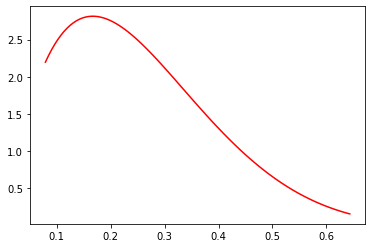

In [15]:
rv = beta(a,b)
x = np.linspace(rv.ppf(0.1), rv.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv.pdf(x), 'r-')

(100.0, 320.0)


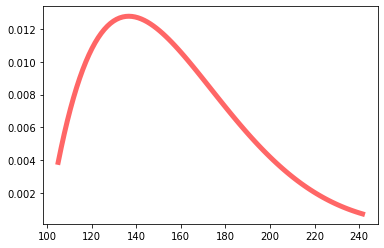

In [18]:
# horizontally shift the beta distribution and rescale its right tail to 

loc, scl = 100, 220
rv = beta(a,b, loc,scl)
print(rv.support())

x = np.linspace(rv.ppf(0.01),
                rv.ppf(0.99), 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6, label='beta pdf')

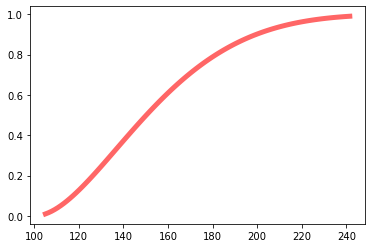

In [19]:
# plot the cdf

fig, ax = plt.subplots(1, 1)
ax.plot(x, rv.cdf(x), 'r-', lw=5, alpha=0.6, label='beta cdf')

# FITTING

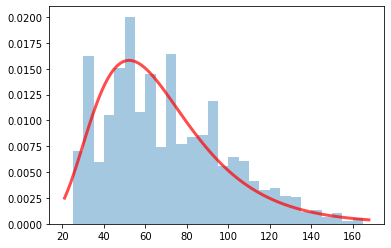

In [96]:
distr = lognorm
data = [p for p in pressure_min if p > 0]
press_min = min(data)
data = [p - press_min for p in data]
data = wind_max

params = distr.fit(data)
rv = distr(*params)

x = np.linspace(rv.ppf(0.01),
                rv.ppf(0.99), 100)

fig, ax = plt.subplots(1, 1)

ax.hist(data, bins=range(min(wind_max), max(wind_max) + 5, 5) , density=True, histtype='stepfilled', alpha=0.4)
ax.plot(x, rv.pdf(x), 'r-', lw=3, alpha=0.7,)

In [78]:
# KS test for goodness of fit: p-value > 0.05 =
stats.kstest(data, distr.name, params)   # return p-value


KstestResult(statistic=0.06649286503293617, pvalue=6.925926509277542e-08)

In [89]:
def kstest(data, distname, paramtup):
    ks = stats.kstest(data, distname, paramtup, ksN)[1]   # return p-value
    return ks             # return p-value 

def fitdist(data, dist):    
    fitted = dist.fit(data)
    ks = kstest(data, dist.name, fitted)
    res = (dist.name, ks, *fitted)
    return res

res = [fitdist(data,D) for D in distributions]

pd.options.display.float_format = '{:,.3f}'.format
df = pd.DataFrame(res, columns=["distribution", "KS p-value", "param1", "param2", "param3", "param4", "param5"])
df["distobj"] = distributions
df.sort_values(by=["KS p-value"], inplace=True, ascending=False)
df.reset_index(inplace=True)
df.drop("index", axis=1, inplace=True)
df

C:\Users\Admin\miniconda3\envs\arcgispro-py3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Admin\miniconda3\envs\arcgispro-py3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Admin\miniconda3\envs\arcgispro-py3\lib\site-packages\scipy\stats\_continuous_distns.py:781: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\Admin\miniconda3\envs\arcgispro-py3\lib\site-packages\scipy\stats\_continuous_distns.py:785: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
C:\Users\Admin\miniconda3\envs\arcgispro-py3\lib\site-packages\scipy\stats\_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
C:\Users\Admin\miniconda3\envs\arcgispr

,distribution,KS p-value,param1,param2,param3,param4,param5,distobj
0,mielke,0.007,4.094,105.205,-21.668,147.934,NaN,<scipy.stats._continuous_distns.mielke_gen obj...
1,loggamma,0.002,0.149,126.118,4.050,NaN,NaN,<scipy.stats._continuous_distns.loggamma_gen o...
2,beta,0.000,"472,543.886",2.262,"-7,694,152.298","7,694,286.523",NaN,<scipy.stats._continuous_distns.beta_gen objec...
3,genextreme,0.000,0.636,93.065,26.082,NaN,NaN,<scipy.stats._continuous_distns.genextreme_gen...
4,powernorm,0.000,"39,803.410",428.831,79.108,NaN,NaN,<scipy.stats._continuous_distns.powernorm_gen ...
...,...,...,...,...,...,...,...,...
56,fisk,0.000,0.444,-0.000,3.055,NaN,NaN,<scipy.stats._continuous_distns.fisk_gen objec...
57,ncx2,0.000,0.000,1.322,-0.000,2.784,NaN,<scipy.stats._continuous_distns.ncx2_gen objec...
58,genpareto,0.000,1.450,-0.000,2.232,NaN,NaN,<scipy.stats._continuous_distns.genpareto_gen ...
59,rdist,0.000,1.193,-9.693,143.693,NaN,NaN,<scipy.stats._continuous_distns.rdist_gen obje...


In [ ]:
kernel = stats.gaussian_kde(data)